In [574]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [196]:
def compute_delta(G):
    ma = np.linalg.norm(G[0] - G[1])
    mi = np.linalg.norm(G[0] - G[1])
    for i in range(n):
        for j in range(i,n):
            if i == j:
                continue
            norm = np.linalg.norm(G[i] - G[j])
            if norm > ma:
                ma = norm
            if norm < mi:
                mi = norm
    return mi, ma

In [468]:
def bin_to_pattern(x):
    return [ [1-int(i), int(i)] for i in x ]
def create_specific_patterns(mode1,mode2,size):
    pats =[]
    for i in range(2):
        for j in range(2):
            pats.append( [[1,1]]*mode1 + bin_to_pattern(str(i)) + [[1,1]]*(mode2-mode1-1) + bin_to_pattern(str(j)) + [[1,1]]*(size-mode1-(mode2-mode1-1)-2) )
    return pats
def create_specific_patterns3(mode1,mode2,mode3,size):
    pats =[]
    for i in range(2):
        for j in range(2):
            for k in range(2):
                pats.append( [[1,1]]*mode1 + bin_to_pattern(str(i)) + [[1,1]]*(mode2-mode1-1) + bin_to_pattern(str(j)) + [[1,1]]*(mode3-(mode2-mode1-1)-mode1-2) + bin_to_pattern(str(k)) + [[1,1]]*(size -mode1-(mode2-mode1-1)-(mode3-(mode2-mode1-1)-mode1-2)-3) )
    return pats
def create_specific_patterns4(mode1,mode2,mode3,mode4,size):
    pats = []
    temp_pats = create_specific_patterns3(mode1,mode2,mode3,size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode4] = bin_to_pattern(str(k))[0]
            pats.append(p_prime)
    return pats
def create_specific_patterns5(mode1, mode2, mode3, mode4, mode5, size):
    """
    Generate specific patterns for 5 modes.
    """
    pats = []
    temp_pats = create_specific_patterns4(mode1, mode2, mode3, mode4, size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode5] = bin_to_pattern(str(k))[0]
            pats.append(p_prime)
    return pats
def create_specific_patterns8(mode1, mode2, mode3, mode4, mode5, mode6, mode7, mode8, size):
    """
    Generate specific patterns for 8 modes.
    """
    pats = []
    temp_pats = create_specific_patterns5(mode1, mode2, mode3, mode4, mode5, size)
    for p in temp_pats:
        for k in range(2):
            p_prime = copy.deepcopy(p)
            p_prime[mode6] = bin_to_pattern(str(k))[0]
            for l in range(2):
                p_prime2 = copy.deepcopy(p_prime)
                p_prime2[mode7] = bin_to_pattern(str(l))[0]
                for m in range(2):
                    p_prime3 = copy.deepcopy(p_prime2)
                    p_prime3[mode8] = bin_to_pattern(str(m))[0]
                    pats.append(p_prime3)
    return pats
def dev_pattern(pat):
    f = np.array([1])
    for i in pat:
        f = np.kron(f,i)
    return f

In [769]:
n = 2**10
N = int(np.log2(n))
m = 10

M = np.random.normal(0, 1/np.sqrt(m), size=(m, n))
M_T = M.T
norms = np.linalg.norm(M_T, axis=1)
M = M_T / norms[:, np.newaxis]
G = M @ M.T

mu = np.max(G - np.identity(n))
print("coherence mu:", mu)
delta_min, delta_max = compute_delta(G)
print("delta:", delta_max)

print(delta_max / (1 - mu))

print(np.argmax(G@X))

coherence mu: 0.9641427181774122
delta: 20.736391843916763
578.3035074023411


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 64 is different from 1024)

In [773]:
all_pat = []

for i in range(N-1):
    all_pat += create_specific_patterns(i, i+1, N)

# for i in range(N-1):
#     for j in range(i+1, N):
#         all_pat += create_specific_patterns(i, j, N)

# for i in range(N-3):
#     all_pat += create_specific_patterns4(i, i+1,i+2,i+3, N)

# for i in range(N-4):
#     all_pat += create_specific_patterns5(i, i+1,i+2,i+3,i+4, N)

M = np.array([dev_pattern(p) for p in all_pat])
m = M.shape[0]
print(f"Number of patterns: {m}")

M_T = M.T
norms = np.linalg.norm(M_T, axis=1)
M = M_T / norms[:, np.newaxis]
G = M @ M.T

mu = np.max(G - np.identity(n))
print("coherence mu:", mu)
delta_min, delta_max = compute_delta(G)
print("delta:", delta_max)

print(delta_max / (1 - mu))

print(np.argmax(G@X))

Number of patterns: 36
coherence mu: 0.8888888888888891
delta: 10.366136701947203
93.29523031752498
682


0.022066695952076283
0.00015813680058676145
0.00015816635587685137
292


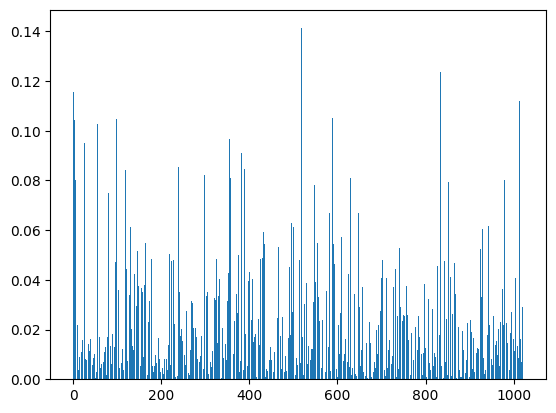

In [766]:
# X = np.random.uniform(0, 100, size=(n, 1))
X = np.random.exponential(scale=3.0, size=(n, 1))
X = X / np.linalg.norm(X)
print(np.average(X))

i,j = np.argsort(X.flatten())[-2:][::-1]
Delta = X[i,0] - X[j,0]
print( Delta / (1 - X[i,0]**2))

v = copy.deepcopy(X)
v[i,0] = 0
v[j,0] = 0
print( Delta / np.linalg.norm(v))

print(i)

plt.bar(range(n), X.flatten())
plt.show()

In [770]:
def estimate_cost(sequence, rules, rewards, starting_positions=None):
    """
    Estimate the cost of a sequence based on the rules, rewards, and starting positions.
    """
    if rules== [] or rewards == []:
        return 0

    if starting_positions is None:
        starting_positions = [list(range(len(sequence) - len(rules[0]) + 1))] * len(rules)

    reward = 0
    rule_length = len(rules[0])

    for rule, rule_reward, positions in zip(rules, rewards, starting_positions):
        for k in positions:  # Only check the specified starting positions
            if k + rule_length <= len(sequence) and np.all(sequence[k:k + rule_length] == rule):
                reward += rule_reward
                
    return np.abs(reward)

sequence_list = np.array([np.array(list(bin(i)[3:]),dtype=np.int32) for i in range(2**N, 2**(N+1))])
def generate_problem():

    rules1 = [(0,0,1), (0,1,1)]
    rules2 = [(1,0,1,0),(1,1,1,1)]
    rules3 = [(0,1)]

    sequence_cost = []
    for sequence in sequence_list:
        rew = 0
        rew += estimate_cost(sequence,rules1, [1])
        rew += estimate_cost(sequence,rules2, [7])
        rew += estimate_cost(sequence,rules3, [3])
        sequence_cost.append(rew)
    sequence_cost = np.array(sequence_cost)
    sequence_cost = sequence_cost /np.linalg.norm(sequence_cost)

    return sequence_cost

sequence_cost = generate_problem()


0.010087126926343469
0.010077900919281681
682


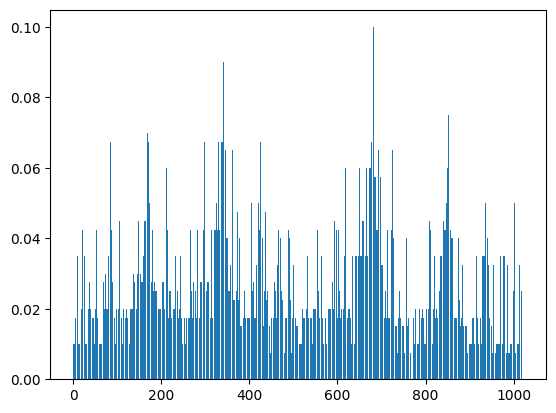

In [771]:
X = copy.deepcopy(sequence_cost.reshape(-1,1))

i,j = np.argsort(X.flatten())[-2:][::-1]
Delta = X[i,0] - X[j,0]
print( Delta / (1 - X[i,0]**2))

v = copy.deepcopy(X)
v[i,0] = 0
v[j,0] = 0
print( Delta / np.linalg.norm(v))

print(i)

plt.bar(range(n), X.flatten())
plt.show()